# Monte Hall Simulation

In [7]:
#Simulating the Monty Hall Problem 
import random
import matplotlib.pyplot as plt

def monty_hall_simulator(simulation_iterations):
    wins_with_switch = 0
    wins_without_switch = 0

    for i in range(simulation_iterations):
        #Randomly choose the door with the prize
        prize_door = random.randint(1, 3)

        #Randomly choose the player's initial door selection
        player_choice = random.randint(1, 3)

        #Monty opens a door with a goat behind it
        #The door opened by Monty cannot be the prize door or the player's choice
        monty_options = [1, 2, 3]
        monty_options.remove(prize_door)
        if player_choice in monty_options:
            monty_options.remove(player_choice)
        monty_opens = random.choice(monty_options)

        #Player switches their choice
        remaining_doors = [1, 2, 3]
        remaining_doors.remove(player_choice)
        remaining_doors.remove(monty_opens)
        switched_choice = remaining_doors[0]

        #Check if the player wins with switch
        if switched_choice == prize_door:
            wins_with_switch += 1

        #Check if the player wins without switch
        if player_choice == prize_door:
            wins_without_switch += 1

    #Calculate probabilities
    switch_probability = wins_with_switch / simulation_iterations
    no_switch_probability = wins_without_switch / simulation_iterations

    #Print and/or return results 
    print(f"Simulations: {simulation_iterations}")
    print(f"Winning probability with switch: {switch_probability:.4f}")
    print(f"Winning probability without switch: {no_switch_probability:.4f}")

    return switch_probability, no_switch_probability

In [10]:
# Run the simulation with 10 iterations
p_win_switch, p_win_stay = monty_hall_simulator(10)
print(f"The probability of winning by switching is, given 10 iterations, is {p_win_switch}")

Simulations: 10
Winning probability with switch: 0.7000
Winning probability without switch: 0.3000
The probability of winning by switching is, given 10 iterations, is 0.7


In [12]:
#Run the simulation with 10,000 iterations
p_win_switch, p_win_stay = monty_hall_simulator(100000)
print(f"The probability of winning by switching, given 10,000 iterations, is {p_win_switch}")

Simulations: 100000
Winning probability with switch: 0.6671
Winning probability without switch: 0.3329
The probability of winning by switching, given 10,000 iterations, is 0.66709


In [17]:
#LLN

#Run the simulation several times with different numbers of iterations and store the results in a list
iterations_list = [5, 10, 50, 100, 250, 1000, 5000]
results_list = []

for i in iterations_list:
    results_list.append(monty_hall_simulator(i))

print(results_list)

Simulations: 5
Winning probability with switch: 0.6000
Winning probability without switch: 0.4000
Simulations: 10
Winning probability with switch: 0.6000
Winning probability without switch: 0.4000
Simulations: 50
Winning probability with switch: 0.6600
Winning probability without switch: 0.3400
Simulations: 100
Winning probability with switch: 0.6000
Winning probability without switch: 0.4000
Simulations: 250
Winning probability with switch: 0.6680
Winning probability without switch: 0.3320
Simulations: 1000
Winning probability with switch: 0.6650
Winning probability without switch: 0.3350
Simulations: 5000
Winning probability with switch: 0.6726
Winning probability without switch: 0.3274
[(0.6, 0.4), (0.6, 0.4), (0.66, 0.34), (0.6, 0.4), (0.668, 0.332), (0.665, 0.335), (0.6726, 0.3274)]


In [18]:
switch_results_list = []

for i in results_list:
    value = i[0]
    switch_results_list.append(value)

print(switch_results_list)

[0.6, 0.6, 0.66, 0.6, 0.668, 0.665, 0.6726]


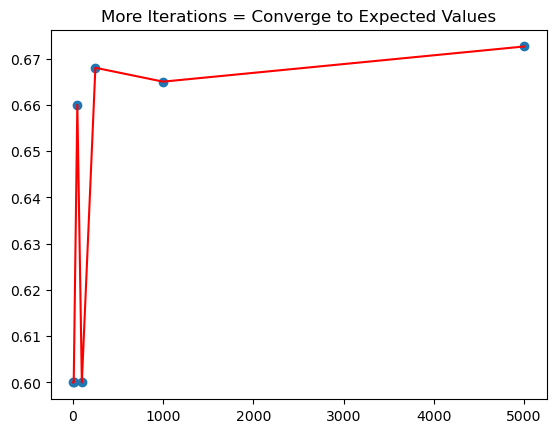

In [19]:
plt.scatter(iterations_list, switch_results_list)
plt.title('More Iterations = Converge to Expected Values')
plt.plot(iterations_list, switch_results_list, '-', color='red', label='Line')
plt.show()